#This project uses openpose and contour module of opencv

In [ ]:
%%bash 
git clone https://github.com/reshma-avvaru/learnopencv.git
cd "/content/learnopencv/OpenPose"

fatal: destination path 'learnopencv' already exists and is not an empty directory.


In [ ]:
!ls

learnopencv  sample_data


In [ ]:
!cd learnopencv

In [ ]:
!ls

learnopencv  sample_data


In [ ]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
MODE = "MPI"

if MODE == "COCO":
    protoFile = "/content/learnopencv/OpenPose/pose/coco/pose_deploy_linevec.prototxt"
    weightsFile = "/content/learnopencv/OpenPose/pose/coco/pose_iter_440000.caffemodel"
    nPoints = 18
    POSE_PAIRS = [ [1,0],[1,2],[1,5],[2,3],[3,4],[5,6],[6,7],[1,8],[8,9],[9,10],[1,11],[11,12],[12,13],[0,14],[0,15],[14,16],[15,17]]

elif MODE == "MPI" :
    protoFile = "/content/learnopencv/OpenPose/pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt"
    weightsFile = "/content/learnopencv/OpenPose/pose/mpi/pose_iter_160000.caffemodel"
    nPoints = 15
    POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]
    

In [ ]:
image1 = cv2.imread("/content/learnopencv/OpenPose/multiple.jpeg")
frameWidth = image1.shape[1]
frameHeight = image1.shape[0]
threshold = 0.1

In [ ]:
!wget http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/coco/pose_iter_440000.caffemodel

--2021-05-30 09:44:08--  http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/coco/pose_iter_440000.caffemodel
Resolving posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)... 128.2.220.57
Connecting to posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)|128.2.220.57|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209274056 (200M) [text/plain]
Saving to: ‘pose_iter_440000.caffemodel’

pose_iter_440000.ca 100%[===================>] 199.58M  64.1MB/s    in 3.3s    

2021-05-30 09:44:11 (60.8 MB/s) - ‘pose_iter_440000.caffemodel’ saved [209274056/209274056]



In [ ]:
!wget http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/mpi/pose_iter_160000.caffemodel

--2021-05-30 09:44:12--  http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/mpi/pose_iter_160000.caffemodel
Resolving posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)... 128.2.220.57
Connecting to posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)|128.2.220.57|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205950363 (196M) [text/plain]
Saving to: ‘pose_iter_160000.caffemodel’

pose_iter_160000.ca 100%[===================>] 196.41M  58.3MB/s    in 3.8s    

2021-05-30 09:44:15 (52.1 MB/s) - ‘pose_iter_160000.caffemodel’ saved [205950363/205950363]



In [ ]:
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

inWidth = 368
inHeight = 368
inpBlob = cv2.dnn.blobFromImage(image1, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)
output = net.forward()
H = output.shape[2]
W = output.shape[3]
print(output.shape)

(1, 44, 46, 46)


In [ ]:
print("Enter path of side image")
img_path=input()
frame = cv2.imread(img_path)
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
threshold = 0.1

Enter path of side image
/content/mside.png


In [ ]:
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output = net.forward()
H = output.shape[2]
W = output.shape[3]

##Points whose probability is greater than the threshold is plotted on the image and skeletion of body parts is made based on the points

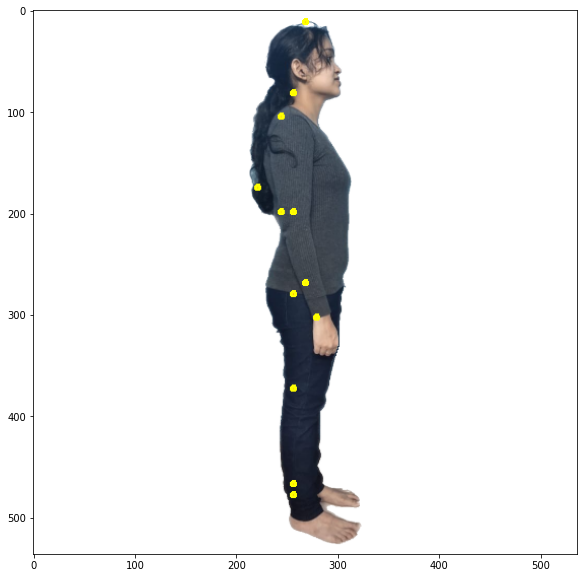

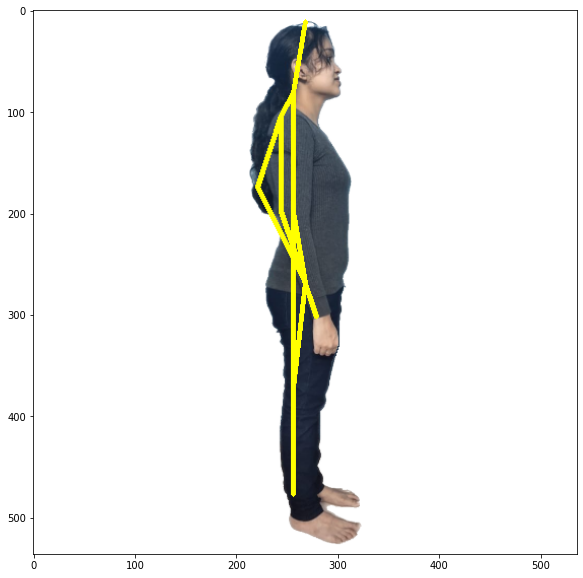

In [ ]:
# Empty list to store the detected keypoints
points = []

for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H

    if prob > threshold : 
        cv2.circle(frameCopy, (int(x), int(y)),3 , (0, 255, 255), thickness=-1,lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0, (0, 0, 255), 0, lineType=cv2.LINE_AA)
        cv2.circle(frame, (int(x), int(y)),1 , (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)

# Draw Skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(frame, points[partA], points[partB], (0, 255, 255), 4)
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

##Using opencv contour function to plot the contours of user image

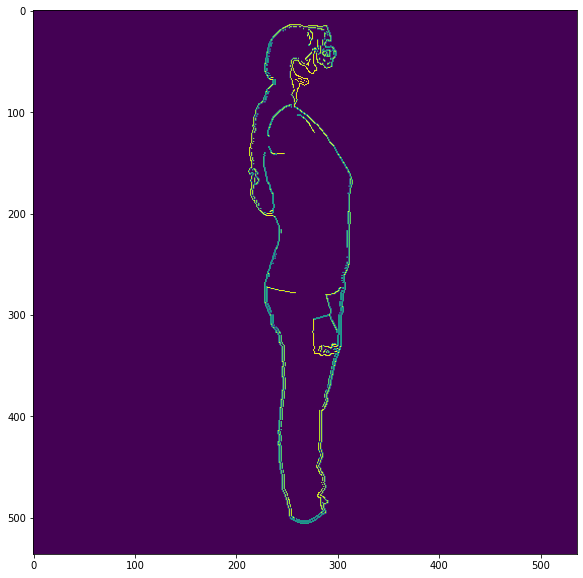

In [ ]:
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
flag, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True) 

# Select long perimeters onl"y"
perimeters = [cv2.arcLength(contours[i],True) for i in range(len(contours))]
listindex=[i for i in range(15) if perimeters[i]>perimeters[0]/2]
numcards=len(listindex)

card_number = -1 #just so happened that this is the worst case
stencil = np.zeros(img.shape).astype(img.dtype)
cv2.drawContours(stencil, [contours[listindex[card_number]]], 0, (255, 255, 255), cv2.FILLED)
res = cv2.bitwise_and(img, stencil)
cnt = cv2.Canny(res, 100, 200)
plt.figure(figsize=[10,10])
plt.imshow(cnt)
# plt.show()

###Plotting the points obtained from openpose on to contour diagram

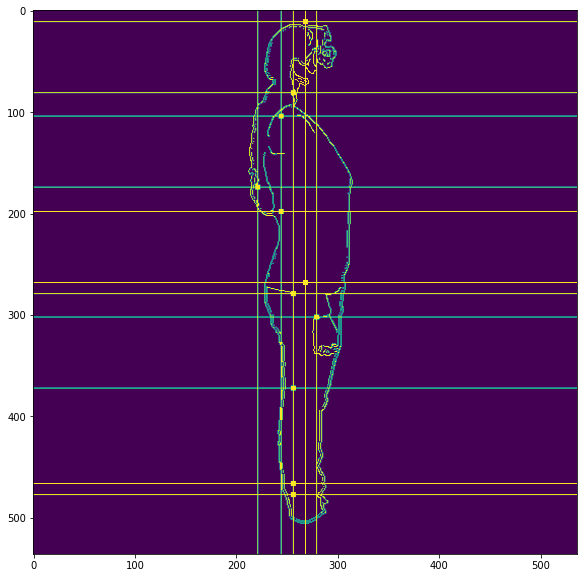

In [ ]:
for i in range(len(points)-1):
	cv2.circle(cnt, (int(points[i][0]),int(points[i][1])),3,(255,255,255),-1)

plt.figure(figsize=[10,10])
imgplot = plt.imshow(cnt)
plt.show()

Understanding the symmetry of human body

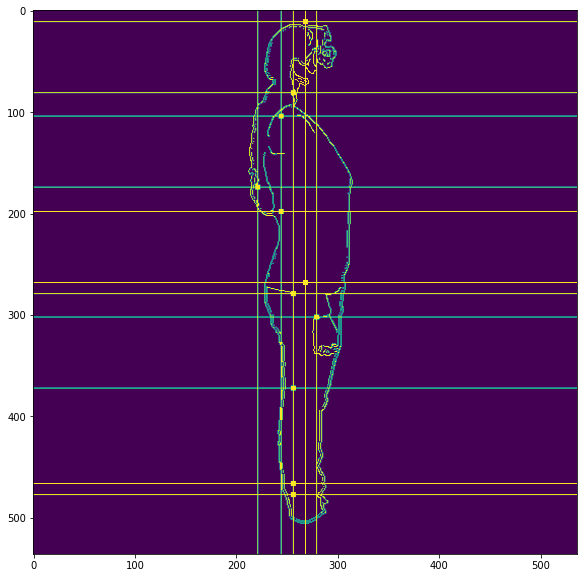

In [ ]:
for i in range(len(points)-1):
  cv2.line(cnt, (points[i][0],0), (points[i][0],1600), (255, 255, 255),1)
plt.figure(figsize=[10,10])
imgplot = plt.imshow(cnt)
plt.show()

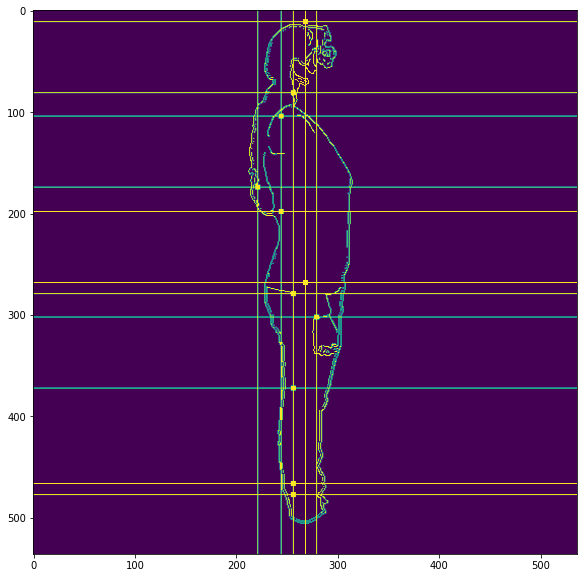

In [ ]:
for i in range(len(points)-1):
  cv2.line(cnt, (0,points[i][1]), (800,points[i][1]), (255, 255, 255),1)
plt.figure(figsize=[10,10])
imgplot = plt.imshow(cnt)
plt.show()